### Load required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import regularizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
df = pd.read_csv('./data/creditcard.csv', index_col=0)
print(df.shape)
df.head()

(284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data check

In [3]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [5]:
df.isnull().values.any()

False

In [6]:
df = df.drop(['Amount'], axis=1)

### Train/test split

In [7]:
frauds = df[df.Class == 1]
#normal = df[df.Class == 0].sample(10000)
normal = df[df.Class == 0]
print("Frauds shape: {}".format(frauds.shape))
print("Normal shape: {}".format(normal.shape))

Frauds shape: (492, 29)
Normal shape: (284315, 29)


In [8]:
data = pd.concat([frauds, normal])
data.shape

(284807, 29)

In [18]:
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train.values

X_test, y_test = X_test.drop(['Class'], axis=1).values, X_test['Class'].values

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (199013, 28)
X_test shape: (85443, 28)


### Visualize the data with TSNE and PCA

In [10]:
x1 = df[df.Class == 1]
x2 = df[df.Class == 0].sample(10000)

dfd = x1.append(x2)
x = dfd.drop(['Class'], axis=1)
y = dfd['Class'].values

SEED = 42

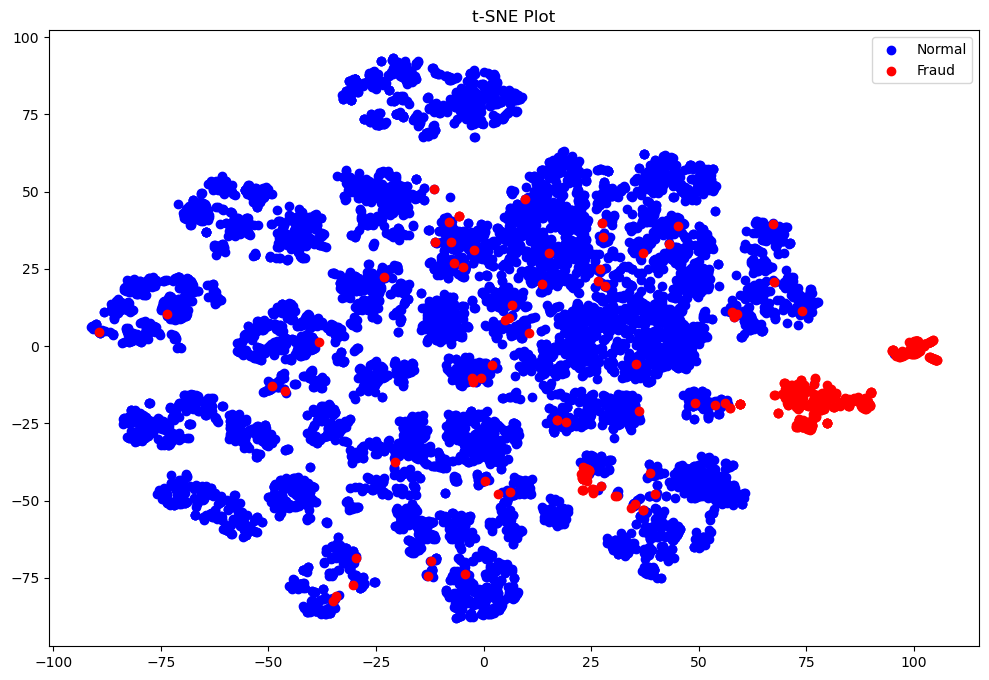

In [11]:
tsne = TSNE(n_components=2, random_state=SEED).fit_transform(x)
plt.figure(figsize=(12,8));
plt.scatter(tsne[np.where(y==0), 0], y=tsne[np.where(y==0), 1], color="blue", label='Normal')
plt.scatter(x=tsne[np.where(y==1), 0], y=tsne[np.where(y==1), 1], color="red", label='Fraud')
plt.title('t-SNE Plot')
plt.legend()
plt.show()

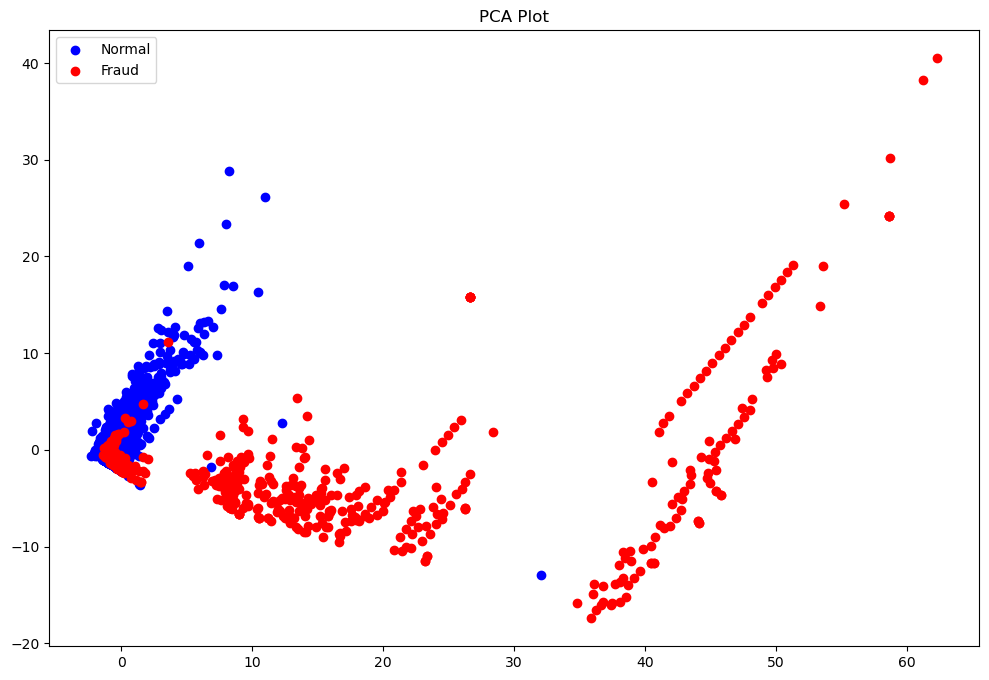

In [12]:
pca = PCA(n_components=2, random_state=SEED).fit_transform(x)
plt.figure(figsize=(12,8));
plt.scatter(pca[np.where(y==0), 0], y=pca[np.where(y==0), 1], color="blue", label='Normal')
plt.scatter(x=pca[np.where(y==1), 0], y=pca[np.where(y==1), 1], color="red", label='Fraud')
plt.title('PCA Plot')
plt.legend()
plt.show()

#### Normalize the data

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit_transform(X_train);
scaler.transform(X_test);

#### Add Noise in data

In [20]:
noise_factor = 0.5;
X_train_noise = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [21]:
X_train

array([[-4.47015639e-01,  8.65305019e-01,  1.31765575e+00, ...,
         7.90364950e-02,  2.42153906e-01,  8.20752770e-02],
       [-7.76571298e-01,  8.04382726e-01,  8.49559235e-01, ...,
        -7.02823940e-02,  2.84993338e-01,  1.38072267e-01],
       [ 2.05364685e+00,  2.43291355e-01, -1.87201382e+00, ...,
        -1.03480710e-01, -3.30833040e-02, -3.87494480e-02],
       ...,
       [ 1.30677752e+00,  2.21806400e-02, -1.63722998e-01, ...,
         6.57813337e-01, -1.15547828e-01, -2.62620900e-03],
       [-9.03948910e-02,  1.94563027e+00,  1.10408884e-01, ...,
        -2.65906742e-01,  3.98424500e-02,  2.41922660e-02],
       [ 9.46585156e-01, -4.77232479e-01,  1.12524039e+00, ...,
         4.29715119e-01,  7.95188190e-02,  1.35189400e-03]])

In [22]:
X_train_noise

array([[-0.94353797,  0.79859229,  2.02864082, ...,  0.41557066,
         0.61200311, -0.63005428],
       [-0.62760344,  2.03069712,  0.43080431, ..., -0.26336249,
         1.23509695, -0.1306153 ],
       [ 1.24678274,  0.94016071, -1.7166402 , ..., -0.16365134,
        -0.56677089, -0.36398654],
       ...,
       [ 1.23645882, -0.00918327,  0.20714516, ...,  0.35784367,
        -0.57764623,  0.33304044],
       [ 1.10689887,  2.46290955,  0.40591707, ...,  0.00497458,
         1.04994385, -0.1437158 ],
       [ 0.47550789, -0.53551062,  1.3796688 , ...,  0.5155874 ,
         0.31614128,  0.1453742 ]])

### Denoising AutoEncoder Model

In [23]:
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim, ))
encoder = Dense(14, activation="relu")(input_layer)
encoder = Dense(7, activation="relu")(encoder)
encoder = Dense(2, activation="relu")(encoder)

decoder = Dense(7, activation="relu")(encoder)
decoder = Dense(14, activation='relu')(decoder)
decoder = Dense(input_dim)(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [24]:
epochs = 100
batch_size = 32
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="./pth/fraudDAE.pth", verbose=0, save_best_only=True)

### Training

In [25]:
history = autoencoder.fit(X_train_noise, X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    callbacks=[checkpointer]).history

Epoch 1/100
5590/5598 [============================>.] - ETA: 0s - loss: 0.7951 - accuracy: 0.3705INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 22s 3ms/step - loss: 0.7948 - accuracy: 0.3706 - val_loss: 0.7094 - val_accuracy: 0.4567
Epoch 2/100
5595/5598 [============================>.] - ETA: 0s - loss: 0.7002 - accuracy: 0.4539INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 17s 3ms/step - loss: 0.7002 - accuracy: 0.4539 - val_loss: 0.6634 - val_accuracy: 0.4733
Epoch 3/100
5584/5598 [============================>.] - ETA: 0s - loss: 0.6465 - accuracy: 0.4706INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 18s 3ms/step - loss: 0.6465 - accuracy: 0.4706 - val_loss: 0.6283 - val_accuracy: 0.4779
Epoch 4/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.4726INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.6269 - accuracy: 0.4726 - val_loss: 0.6208 - val_accuracy: 0.4826
Epoch 5/100
5584/5598 [============================>.] - ETA: 0s - loss: 0.6142 - accuracy: 0.4767INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 25s 4ms/step - loss: 0.6140 - accuracy: 0.4768 - val_loss: 0.6087 - val_accuracy: 0.4859
Epoch 6/100
5594/5598 [============================>.] - ETA: 0s - loss: 0.6058 - accuracy: 0.4803INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.6060 - accuracy: 0.4802 - val_loss: 0.6004 - val_accuracy: 0.4879
Epoch 7/100
5584/5598 [============================>.] - ETA: 0s - loss: 0.6001 - accuracy: 0.4820INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.6005 - accuracy: 0.4820 - val_loss: 0.5946 - val_accuracy: 0.4882
Epoch 8/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5958 - accuracy: 0.4828INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5958 - accuracy: 0.4828 - val_loss: 0.5896 - val_accuracy: 0.4911
Epoch 9/100
5598/5598 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.4819INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5922 - accuracy: 0.4819 - val_loss: 0.5885 - val_accuracy: 0.4894
Epoch 10/100
5591/5598 [============================>.] - ETA: 0s - loss: 0.5899 - accuracy: 0.4811INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5898 - accuracy: 0.4811 - val_loss: 0.5828 - val_accuracy: 0.4916
Epoch 11/100
5581/5598 [============================>.] - ETA: 0s - loss: 0.5857 - accuracy: 0.4827INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5859 - accuracy: 0.4829 - val_loss: 0.5793 - val_accuracy: 0.4923
Epoch 12/100
5597/5598 [============================>.] - ETA: 0s - loss: 0.5825 - accuracy: 0.4835INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5825 - accuracy: 0.4835 - val_loss: 0.5784 - val_accuracy: 0.4923
Epoch 13/100
5585/5598 [============================>.] - ETA: 0s - loss: 0.5777 - accuracy: 0.4872INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 17s 3ms/step - loss: 0.5777 - accuracy: 0.4872 - val_loss: 0.5739 - val_accuracy: 0.4955
Epoch 14/100
5597/5598 [============================>.] - ETA: 0s - loss: 0.5745 - accuracy: 0.4885INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5745 - accuracy: 0.4885 - val_loss: 0.5692 - val_accuracy: 0.4967
Epoch 15/100
5590/5598 [============================>.] - ETA: 0s - loss: 0.5711 - accuracy: 0.4874INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5710 - accuracy: 0.4874 - val_loss: 0.5671 - val_accuracy: 0.4953
Epoch 16/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5697 - accuracy: 0.4869 - val_loss: 0.5681 - val_accuracy: 0.4949
Epoch 17/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5659 - accuracy: 0.4855INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5659 - accuracy: 0.4856 - val_loss: 0.5639 - val_accuracy: 0.4916
Epoch 18/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5652 - accuracy: 0.4851 - val_loss: 0.5639 - val_accuracy: 0.4911
Epoch 19/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5632 - accuracy: 0.4841 - val_loss: 0.5652 - val_accuracy: 0.4892
Epoch 20/100
5581/5598 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.4841INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 20s 4ms/step - loss: 0.5626 - accuracy: 0.4841 - val_loss: 0.5609 - val_accuracy: 0.4855
Epoch 21/100
5594/5598 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.4846INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5602 - accuracy: 0.4846 - val_loss: 0.5583 - val_accuracy: 0.4927
Epoch 22/100
5598/5598 [==============================] - 16s 3ms/step - loss: 0.5605 - accuracy: 0.4842 - val_loss: 0.5607 - val_accuracy: 0.4859
Epoch 23/100
5589/5598 [============================>.] - ETA: 0s - loss: 0.5590 - accuracy: 0.4828INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5590 - accuracy: 0.4828 - val_loss: 0.5557 - val_accuracy: 0.4923
Epoch 24/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5586 - accuracy: 0.4835 - val_loss: 0.5567 - val_accuracy: 0.4900
Epoch 25/100
5598/5598 [==============================] - 14s 2ms/step - loss: 0.5576 - accuracy: 0.4839 - val_loss: 0.5559 - val_accuracy: 0.4939
Epoch 26/100
5598/5598 [==============================] - 14s 2ms/step - loss: 0.5570 - accuracy: 0.4849 - val_loss: 0.5572 - val_accuracy: 0.4981
Epoch 27/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5556 - accuracy: 0.4868 - val_loss: 0.5558 - val_accuracy: 0.4976
Epoch 28/100
5596/5598 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.4858INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5559 - accuracy: 0.4858 - val_loss: 0.5534 - val_accuracy: 0.4973
Epoch 29/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5569 - accuracy: 0.4854 - val_loss: 0.5572 - val_accuracy: 0.4932
Epoch 30/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5551 - accuracy: 0.4870 - val_loss: 0.5540 - val_accuracy: 0.4913
Epoch 31/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5557 - accuracy: 0.4859 - val_loss: 0.5535 - val_accuracy: 0.4937
Epoch 32/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5549 - accuracy: 0.4869 - val_loss: 0.5544 - val_accuracy: 0.4886
Epoch 33/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5544 - accuracy: 0.4878 - val_loss: 0.5541 - val_accuracy: 0.4956
Epoch 34/100
5579/5598 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.4872INFO:tensorflow:Assets written t

INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5540 - accuracy: 0.4873 - val_loss: 0.5518 - val_accuracy: 0.4989
Epoch 35/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5528 - accuracy: 0.4873 - val_loss: 0.5544 - val_accuracy: 0.4892
Epoch 36/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5533 - accuracy: 0.4885 - val_loss: 0.5526 - val_accuracy: 0.4941
Epoch 37/100
5594/5598 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.4883INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5548 - accuracy: 0.4883 - val_loss: 0.5501 - val_accuracy: 0.4915
Epoch 38/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5532 - accuracy: 0.4890 - val_loss: 0.5541 - val_accuracy: 0.4970
Epoch 39/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5525 - accuracy: 0.4879 - val_loss: 0.5506 - val_accuracy: 0.4937
Epoch 40/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5530 - accuracy: 0.4866 - val_loss: 0.5597 - val_accuracy: 0.4944
Epoch 41/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5527 - accuracy: 0.4875 - val_loss: 0.5505 - val_accuracy: 0.4957
Epoch 42/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5533 - accuracy: 0.4880 - val_loss: 0.5533 - val_accuracy: 0.4929
Epoch 43/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5521 - accuracy: 0.4857 - val_loss: 0.5511 - val_a

INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 19s 3ms/step - loss: 0.5530 - accuracy: 0.4835 - val_loss: 0.5490 - val_accuracy: 0.4969
Epoch 49/100
5598/5598 [==============================] - 18s 3ms/step - loss: 0.5541 - accuracy: 0.4833 - val_loss: 0.5616 - val_accuracy: 0.4897
Epoch 50/100
5598/5598 [==============================] - 16s 3ms/step - loss: 0.5542 - accuracy: 0.4805 - val_loss: 0.5573 - val_accuracy: 0.4892
Epoch 51/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.5548 - accuracy: 0.4811 - val_loss: 0.5517 - val_accuracy: 0.4910
Epoch 52/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5538 - accuracy: 0.4814 - val_loss: 0.5520 - val_accuracy: 0.4834
Epoch 53/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5532 - accuracy: 0.4823 - val_loss: 0.5512 - val_accuracy: 0.4961
Epoch 54/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5521 - accuracy: 0.4837 - val_loss: 0.5615 - val_a

INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 14s 2ms/step - loss: 0.5506 - accuracy: 0.4843 - val_loss: 0.5485 - val_accuracy: 0.4930
Epoch 63/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5517 - accuracy: 0.4850 - val_loss: 0.5493 - val_accuracy: 0.4960
Epoch 64/100
5598/5598 [==============================] - 12s 2ms/step - loss: 0.5514 - accuracy: 0.4869 - val_loss: 0.5553 - val_accuracy: 0.4912
Epoch 65/100
5598/5598 [==============================] - 11s 2ms/step - loss: 0.5500 - accuracy: 0.4877 - val_loss: 0.5632 - val_accuracy: 0.4877
Epoch 66/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5536 - accuracy: 0.4861 - val_loss: 0.5529 - val_accuracy: 0.4930
Epoch 67/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5504 - accuracy: 0.4866 - val_loss: 0.5500 - val_accuracy: 0.4920
Epoch 68/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5512 - accuracy: 0.4856 - val_loss: 0.5506 - val_a

INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 12s 2ms/step - loss: 0.5507 - accuracy: 0.4850 - val_loss: 0.5463 - val_accuracy: 0.5006
Epoch 73/100
5598/5598 [==============================] - 11s 2ms/step - loss: 0.5518 - accuracy: 0.4844 - val_loss: 0.5498 - val_accuracy: 0.4883
Epoch 74/100
5598/5598 [==============================] - 15s 3ms/step - loss: 0.5522 - accuracy: 0.4852 - val_loss: 0.5559 - val_accuracy: 0.4957
Epoch 75/100
5598/5598 [==============================] - 19s 3ms/step - loss: 0.5514 - accuracy: 0.4845 - val_loss: 0.5508 - val_accuracy: 0.4943
Epoch 76/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5514 - accuracy: 0.4857 - val_loss: 0.5473 - val_accuracy: 0.4934
Epoch 77/100
5598/5598 [==============================] - 14s 2ms/step - loss: 0.5498 - accuracy: 0.4867 - val_loss: 0.6174 - val_accuracy: 0.4942
Epoch 78/100
5598/5598 [==============================] - 14s 3ms/step - loss: 0.5510 - accuracy: 0.4856 - val_loss: 0.5468 - val_a

INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 16s 3ms/step - loss: 0.5489 - accuracy: 0.4815 - val_loss: 0.5455 - val_accuracy: 0.4930
Epoch 98/100
5598/5598 [==============================] - 14s 2ms/step - loss: 0.5505 - accuracy: 0.4812 - val_loss: 0.5480 - val_accuracy: 0.4958
Epoch 99/100
5590/5598 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.4825INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


INFO:tensorflow:Assets written to: ./pth\fraudDAE.pth\assets


5598/5598 [==============================] - 15s 3ms/step - loss: 0.5484 - accuracy: 0.4825 - val_loss: 0.5445 - val_accuracy: 0.4927
Epoch 100/100
5598/5598 [==============================] - 13s 2ms/step - loss: 0.5471 - accuracy: 0.4846 - val_loss: 0.5592 - val_accuracy: 0.4913


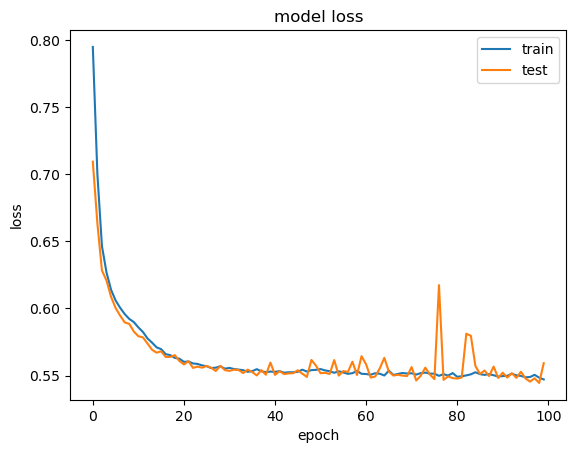

In [26]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

### Test

In [27]:
dae = load_model('./pth/fraudDAE.pth')

In [28]:
predictions = dae.predict(X_test_noise)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2671/2671 [==============================] - 5s 2ms/step


,reconstruction_error,true_class
count,85443.000000,85443.00000
mean,0.579484,0.00165
std,1.912412,0.04059
min,0.068014,0.00000
25%,0.239979,0.00000
50%,0.365677,0.00000
75%,0.619123,0.00000
max,111.470993,1.00000


In [35]:
threshold = 10

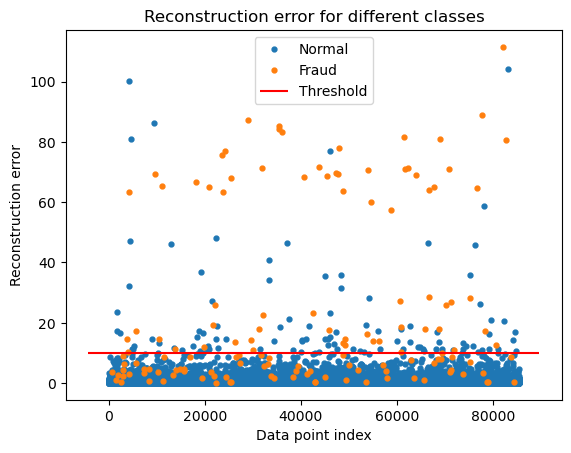

In [36]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

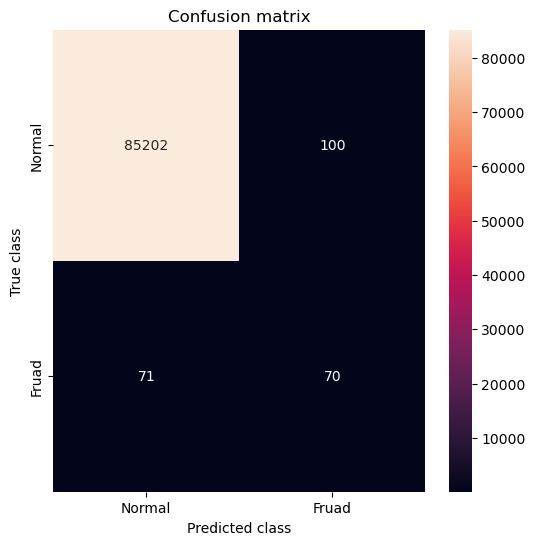

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
LABELS = ["Normal", "Fruad"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [39]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.9979986657771848
Precision : 0.4117647058823529
Recall : 0.49645390070921985
F1 : 0.4501607717041801


### Visualize the latent space

In [32]:
inp_layer = dae.input
out_layer = dae.layers[3].output

encoder = Model(inputs=inp_layer, outputs=out_layer)

In [33]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_6 (Dense)             (None, 14)                406       
                                                                 
 dense_7 (Dense)             (None, 7)                 105       
                                                                 
 dense_8 (Dense)             (None, 2)                 16        
                                                                 
Total params: 527 (2.06 KB)
Trainable params: 527 (2.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2671/2671 [==============================] - 4s 2ms/step


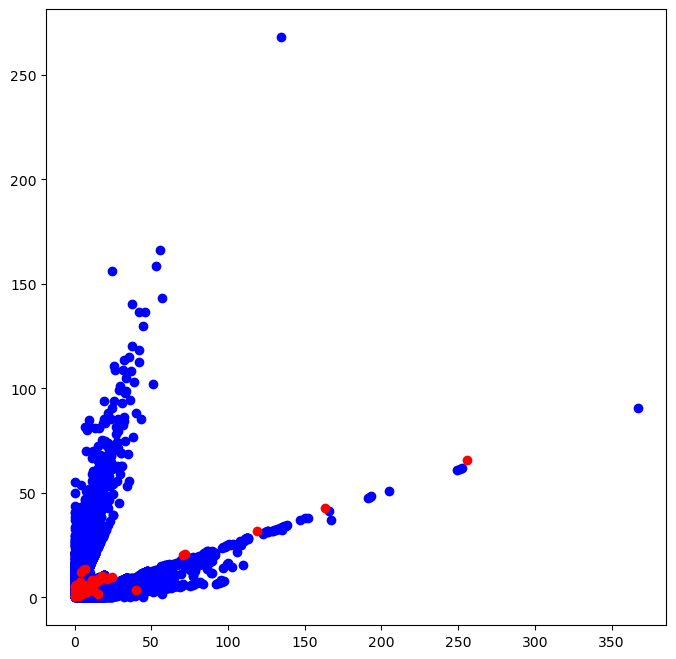

In [34]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

X_encoded = np.vstack((X_train_encoded, X_test_encoded))
y_main = np.hstack((np.zeros(len(X_train)), y_test))

encoded_df = pd.DataFrame(np.hstack((X_encoded, y_main[np.newaxis].transpose())))

plt.subplots(figsize=(8,8))
plt.scatter(encoded_df[encoded_df[2]==0][0],encoded_df[encoded_df[2]==0][1], color='blue', label='Normal')
plt.scatter(encoded_df[encoded_df[2]==1][0],encoded_df[encoded_df[2]==1][1], color='red', label='Fraud');